In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
import seaborn as sns
%matplotlib inline

In [4]:
drug_data=pd.read_csv("D:\Data science from USB\ML\Jupiter Notebook\Excel files\drug200.csv")
drug_data.shape

(200, 6)

In [5]:
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
drug_data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [8]:
drug_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

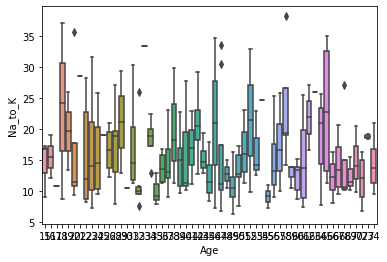

In [25]:
sns.boxplot(drug_data['Age'],drug_data['Na_to_K'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


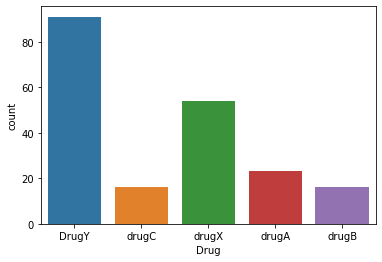

In [19]:
sns.countplot(drug_data['Drug'])
plt.show()

In [29]:
labels=['DrugY','drugC','drugX','drugA','drugB']
values=drug_data['Drug'].value_count().value
fig1,ax1=plt.subplots()
colors = ['gold', 'lightskyblue','red','yellow','green']
ax1.pie(values, labels=labels,autopct='1%,1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

AttributeError: 'Series' object has no attribute 'value_count'

In [9]:
print(pd.isnull(drug_data))

       Age    Sex     BP  Cholesterol  Na_to_K   Drug
0    False  False  False        False    False  False
1    False  False  False        False    False  False
2    False  False  False        False    False  False
3    False  False  False        False    False  False
4    False  False  False        False    False  False
..     ...    ...    ...          ...      ...    ...
195  False  False  False        False    False  False
196  False  False  False        False    False  False
197  False  False  False        False    False  False
198  False  False  False        False    False  False
199  False  False  False        False    False  False

[200 rows x 6 columns]


Text(0.5, 1.0, 'Correlation')

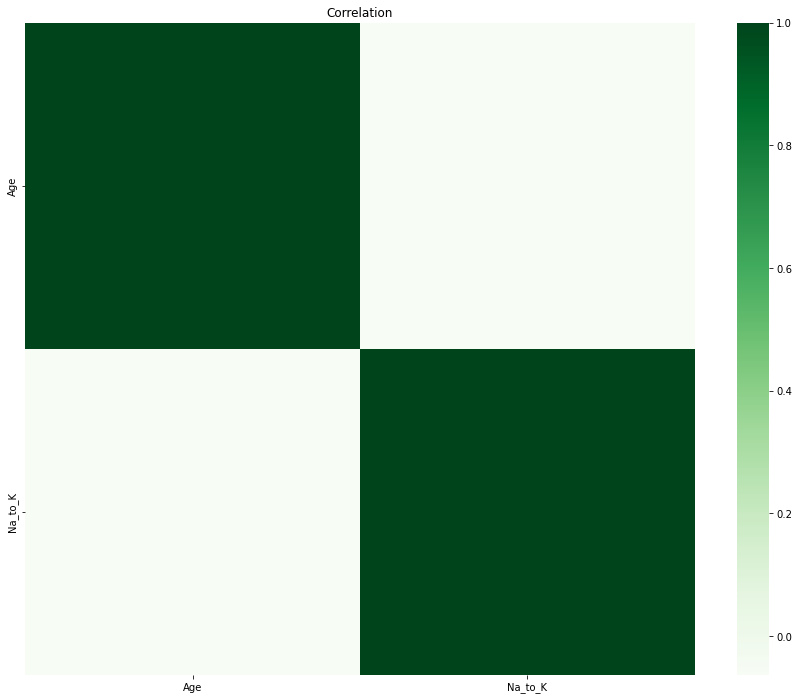

In [14]:
cr=drug_data.corr()
fig=plt.figure(figsize=(15,12))
r=sns.heatmap(cr,cmap='Greens')
r.set_title('Correlation')

<AxesSubplot:xlabel='BP', ylabel='Age'>

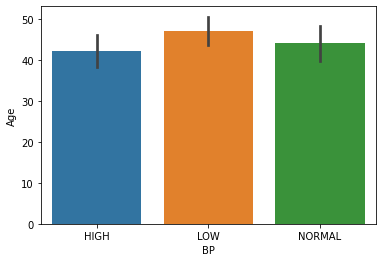

In [17]:
sns.barplot(x='BP', y='Age', data=drug_data)

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

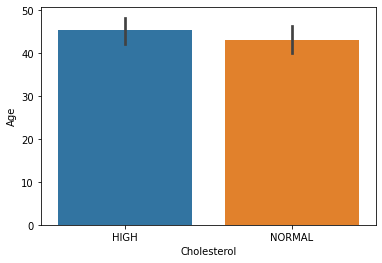

In [18]:
sns.barplot(x='Cholesterol', y='Age', data=drug_data)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

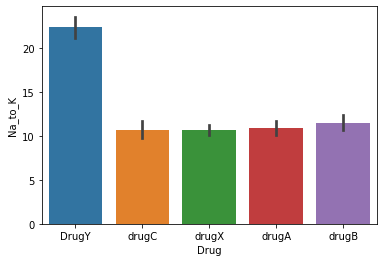

In [30]:
sns.barplot(x='Drug', y='Na_to_K', data=drug_data)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [36]:
drug_data['labels_1']=LabelEncoder().fit_transform(drug_data['Drug'])
drug_data['labels_2']=LabelEncoder().fit_transform(drug_data['Sex'])
drug_data['labels_3']=LabelEncoder().fit_transform(drug_data['BP'])
drug_data['labels_4']=LabelEncoder().fit_transform(drug_data['Cholesterol'])
print(drug_data.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug  labels  labels_1  labels_2  \
0   23   F    HIGH        HIGH   25.355  DrugY       0         0         0   
1   47   M     LOW        HIGH   13.093  drugC       3         3         1   
2   47   M     LOW        HIGH   10.114  drugC       3         3         1   
3   28   F  NORMAL        HIGH    7.798  drugX       4         4         0   
4   61   F     LOW        HIGH   18.043  DrugY       0         0         0   

   labels_3  labels_4  
0         0         0  
1         1         0  
2         1         0  
3         2         0  
4         1         0  


In [39]:
x=drug_data['Na_to_K']
y=drug_data['labels_1']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)